Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 1.0
Pruned Decision Tree - Test Accuracy: 0.7111111111111111
Random Forest - Test Accuracy: 1.0
AdaBoost - Test Accuracy: 1.0


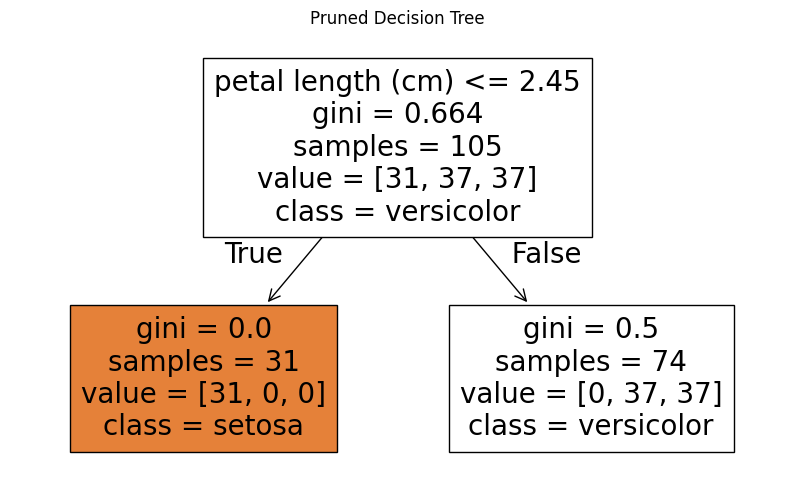

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step a: Load dataset and split
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step b: Build Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step c: Check model performance
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, dt.predict(X_test))
print("Decision Tree - Train Accuracy:", train_acc)
print("Decision Tree - Test Accuracy:", test_acc)

# Step d: Cost complexity pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[-2])  # choose a good alpha
dt_pruned.fit(X_train, y_train)
print("Pruned Decision Tree - Test Accuracy:", accuracy_score(y_test, dt_pruned.predict(X_test)))

# Step e: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# Step f: AdaBoost with Decision Stumps (depth=1)
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(estimator=stump, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost - Test Accuracy:", accuracy_score(y_test, ada.predict(X_test)))

# Optional: Visualize the pruned tree
plt.figure(figsize=(10, 6))
plot_tree(dt_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pruned Decision Tree")
plt.show()


# 🌳 Decision Trees in Machine Learning

## ✅ What is a Decision Tree?

A **Decision Tree** is a supervised machine learning model used for **classification** and **regression** tasks. It works by splitting the data into subsets based on the value of input features, forming a tree-like structure where:

- **Nodes** represent features/conditions.
- **Edges** represent outcomes of decisions.
- **Leaves** represent final classes (for classification) or values (for regression).

---

## ⚙️ How Does It Work?

1. **Start with the entire dataset.**
2. **Choose the best feature** to split the data based on a splitting criterion.
3. **Split the data** into subsets based on the feature's value.
4. Repeat this process recursively on each subset until:
   - All data in a node belongs to the same class (pure).
   - Maximum depth is reached.
   - Minimum samples per node condition is met.

---

## 🔢 Splitting Criteria

### 1. **Gini Impurity**
- Measures the likelihood of incorrect classification of a randomly chosen element.
- Formula:
  \[
  Gini = 1 - \sum_{i=1}^{n} p_i^2
  \]
  where \( p_i \) is the probability of class \( i \) in the node.

### 2. **Entropy (Information Gain)**
- Measures the disorder or impurity.
- Formula:
  \[
  Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)
  \]
  \[
  Information\ Gain = Entropy_{parent} - \sum \left( \frac{n_{child}}{n_{total}} \times Entropy_{child} \right)
  \]

### 3. **Mean Squared Error (for Regression Trees)**
- Used for regression problems.
- Measures variance of target values in the node.

### ➡️ How to Decide the Best Feature?
Choose the feature that gives the **highest Information Gain** (or lowest Gini/Entropy/MSE after split).

---

## ✂️ Pruning in Decision Trees

### 🔍 Why Prune?
- Prevent **overfitting** (i.e., fitting noise in training data).
- Improve **generalization** on unseen data.

### 🌿 Types of Pruning:
1. **Pre-Pruning (Early Stopping)**:
   - Stop growing the tree early based on max depth, min samples, etc.

2. **Post-Pruning (Cost Complexity Pruning)**:
   - Grow a complete tree, then remove branches that don't improve performance significantly.

### 📐 Cost Complexity Pruning Formula:
\[
C_{\alpha}(T) = R(T) + \alpha \cdot |T|
\]
- \( R(T) \): total error of tree \( T \)
- \( |T| \): number of terminal nodes
- \( \alpha \): complexity parameter

---

## 🌲 Random Forest: Overcoming Overfitting

### 💡 What is Random Forest?
An **ensemble learning** method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.

### 🔧 How It Works:
- **Bootstrap Aggregation (Bagging)**: Train each tree on a random sample of the data.
- **Feature Randomness**: Random subset of features considered for each split.
- **Voting/Averaging**:
  - Classification: majority vote.
  - Regression: average of predictions.

### 🧠 Why Random Forest Prevents Overfitting?
- Reduces variance by averaging multiple diverse models.
- Each tree is less likely to overfit due to randomness.

---

## ⚡ AdaBoost with Decision Stumps

### ⚙️ What is AdaBoost?
AdaBoost (**Adaptive Boosting**) is an ensemble method that **combines weak learners** (e.g., decision stumps) to form a strong learner.

### 🌱 What is a Decision Stump?
- A **one-level decision tree** (only one split).
- Very weak classifier by itself.

### 🔄 Working of AdaBoost:
1. Train a weak model (stump).
2. Increase weights of misclassified samples.
3. Train next stump focusing more on difficult samples.
4. Final prediction = weighted sum of all weak learners.

### 🧠 Why Use Stumps?
- Stumps are simple but can be combined effectively via boosting to capture complex patterns.

---

## 📘 Example Use Case: Spam Email Detection

| Feature         | Description                             |
|-----------------|-----------------------------------------|
| Contains "free"?| Yes/No                                  |
| Has attachment? | Yes/No                                  |
| Is sender trusted? | Yes/No                              |
| Email length     | Number of words                        |

- Root Node: "Contains 'free'?"
- Split: If **yes**, go to spam leaf; if **no**, evaluate next best feature (e.g., trusted sender).
- Continue until leaves are pure or max depth is reached.

---

## ✅ Summary Table

| Technique                     | Purpose                            | Benefits                             |
|-------------------------------|------------------------------------|--------------------------------------|
| **Decision Tree**             | Base model                         | Easy to understand & interpret       |
| **Pruning (Post-pruning)**    | Reduce overfitting                 | Improves generalization              |
| **Cost Complexity Pruning**   | Prune based on error + size        | Balances bias-variance tradeoff      |
| **Random Forest**             | Ensemble of trees via bagging      | Reduces overfitting & increases accuracy |
| **AdaBoost with Stumps**      | Boost weak learners                | Converts weak stumps into strong model |

---

## 🎯 Viva Questions You May Be Asked

- What are the components of a decision tree?
- Explain Gini vs Entropy. When do you use each?
- What is cost complexity pruning? Explain the formula.
- How does Random Forest prevent overfitting?
- What is the difference between Bagging and Boosting?
- Why are decision stumps used in AdaBoost?
- In your code, why did test accuracy drop after pruning?
- How do you know a leaf node is pure?

